# Importing the independencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data Collection & Analysis

In [6]:
# loading data from csv files to pandas dataframe

In [7]:
customer_data = pd.read_csv(r'C:\Users\USER\Videos\New folder (8)\machine learning projects\customer segementation project\Mall_Customers.csv')

In [8]:
# first 5 rows from the dataframe

In [9]:
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# finding the numbers of rows and column

In [11]:
customer_data.shape

(200, 5)

In [12]:
# Getting some information about the dataset

In [13]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
# checking for missing values in the dataset

In [15]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Choosing the Annual Income Column & Spending Score Column

In [16]:
customer_data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [17]:
# using iloc function to locate the index number of the columns
X = customer_data.iloc[:,[3,4]].values

In [18]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the Number of Clusters

# WCSS > Within Clusters Sum of Squares

In [19]:
# find WCSS value for different number of the clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

C:\Users\USER\Anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


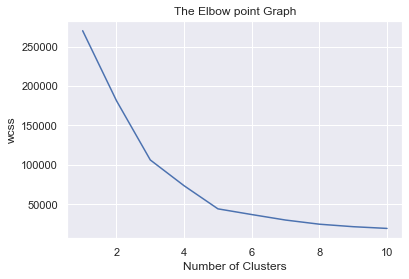

In [20]:
#plot an elbow graph\
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

The Optimum Number of Clusters = 5

# Training the k-means Clustering Model 

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [22]:
# return a label for each data point based on their cluster

In [23]:
Y = kmeans.fit_predict(X)

In [24]:
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

5 Clusters are 0, 1, 2, 3, 4

# Visualizing all the Clusters

In [25]:
# plotting all the clusters and their centroids 

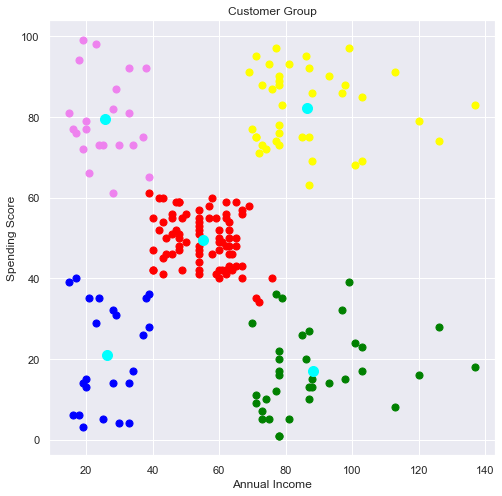

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')
plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

For the green colour cluster, they earn high income per annual and less spending score. They can intend to buy more, we can increase the customers satisfaction so as to increase the profit of the mall.